In [4]:
# Exercise 1

import pandas as pd
from sklearn import preprocessing

file_path = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
dataset = pd.read_csv(file_path) 

# We clean the dataset by removing the rows with missing values (incomplete data)
dataset.replace(' ', pd.NA, inplace=True)
dataset = dataset.dropna()

# Categorical columns encoding
label_encoder = preprocessing.OrdinalEncoder()
categorical_columns = [['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
           'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']]
label_encoder.fit(categorical_columns)

for column in categorical_columns:
    dataset[column] = label_encoder.fit_transform(dataset[column])

# Numerical columns scaling
scaler = StandardScaler()
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges'] 

dataset[numerical_columns] = scaler.fit_transform(dataset[numerical_columns])

print(dataset.head())

   customerID  gender  SeniorCitizen  Partner  Dependents    tenure  \
0  7590-VHVEG     0.0              0      1.0         0.0 -1.280248   
1  5575-GNVDE     1.0              0      0.0         0.0  0.064303   
2  3668-QPYBK     1.0              0      0.0         0.0 -1.239504   
3  7795-CFOCW     1.0              0      0.0         0.0  0.512486   
4  9237-HQITU     0.0              0      0.0         0.0 -1.239504   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0           0.0            1.0              0.0             0.0  ...   
1           1.0            0.0              0.0             2.0  ...   
2           1.0            0.0              0.0             2.0  ...   
3           0.0            1.0              0.0             2.0  ...   
4           1.0            0.0              1.0             0.0  ...   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0               0.0          0.0          0.0              0.0  

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30


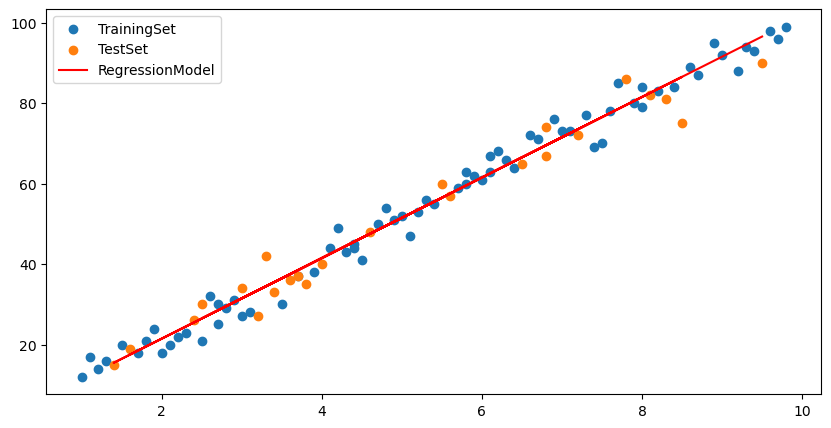

In [4]:
# Exercise 2
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Load data
file_path = 'scores.csv'
df = pd.read_csv(file_path) 
print(df.head())

# Prepare data
x = np.array(df['Hours'])
y = np.array(df['Scores'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

# Reshape features into 2D arrays
x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

# Train model
lr = LinearRegression().fit(x_train, y_train)
lr.predict([[7.2]])
y_prediction = lr.predict(x_test)

# Plot results
plt.figure(figsize=(10,5))
plt.scatter(x_train, y_train, label='TrainingSet')
plt.scatter(x_test, y_test, label='TestSet')
plt.plot(x_test, y_prediction, color='red', label='RegressionModel')

plt.legend()
plt.show()

In [ ]:
# Exercise 3

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Load data
file_path = 'scores.csv'
df = pd.read_csv(file_path) 

# Drop rows with missing values
df.replace(' ', pd.NA, inplace=True)
df = df.dropna()

# Train and test the data
X = np.array(df['Hours'])
y = np.array(df['Scores'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

# Regularization
lasso = Lasso(alpha=1.0).fit(X_train, y_train)
ridge =  Ridge(alpha=0.7).fit(X_train, y_train)
elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.01).fit(X_train, y_train)

print(f"Lasso Regression Training set score: {lasso.score(X_test, y_test):.2f}")
print(f"Ridge Regression Training set score: {ridge.score(X_test, y_test):.2f}")
print(f"Elastic Net Training set score: {elastic_net.score(X_test, y_test):.2f}")

Lasso Regression-Training set score: 0.97
Ridge Regression-Training set score: 0.97
Elastic Net-Training set score: 0.97
